In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

df=pd.read_csv("question4.csv")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Outlook        10 non-null object
Temperature    10 non-null object
Humidity       10 non-null object
Wind           10 non-null object
Play           10 non-null object
dtypes: object(5)
memory usage: 528.0+ bytes


In [130]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,Yes
2,Rain,Hot,High,Weak,Yes
3,Rain,Mild,Normal,Strong,No
4,Rain,Cool,High,Weak,No


In [131]:
#use label encoder to translate the features and targets into numbers
le=preprocessing.LabelEncoder()
outlook_encoded=le.fit_transform(df.Outlook)
tmp_encoded=le.fit_transform(df.Temperature)
hum_encoded=le.fit_transform(df.Humidity)
wind_encoded=le.fit_transform(df.Wind)
play_encoded=le.fit_transform(df.Play)

In [132]:
df["outlook_cat"]=outlook_encoded
df["tmp_cat"]=tmp_encoded
df["hum_cat"]=hum_encoded
df["wind_cat"]=wind_encoded
df["play_cat"]=play_encoded

In [142]:
df

,Outlook,Temperature,Humidity,Wind,Play,outlook_cat,tmp_cat,hum_cat,wind_cat,play_cat
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,Yes,2,1,0,0,1
2,Rain,Hot,High,Weak,Yes,1,1,0,1,1
3,Rain,Mild,Normal,Strong,No,1,2,1,0,0
4,Rain,Cool,High,Weak,No,1,0,0,1,0
5,Rain,Mild,Normal,Strong,No,1,2,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Sunny,Cool,High,Weak,No,2,0,0,1,0
8,Sunny,Cool,High,Strong,Yes,2,0,0,0,1
9,Rain,Mild,High,Strong,Yes,1,2,0,0,1


In [133]:
feature=df.values[:,5:9]
target=df.values[:,9]
target=target.astype(int)

In [134]:
xTrain,xTest,yTrain,yTest=train_test_split(feature,target,test_size=0.2,random_state=1)

In [135]:
#Split 80/20 data set into train and test sets
model=DecisionTreeClassifier()

model.fit(xTrain,yTrain)

yPredict=model.predict(xTest)

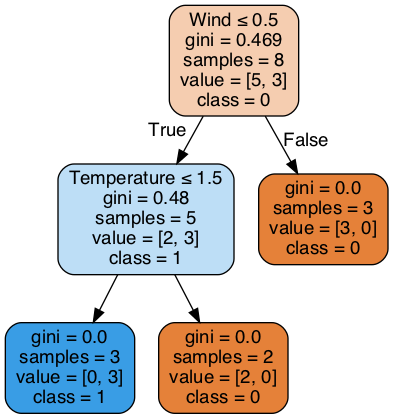

In [136]:
from  sklearn.tree import export_graphviz
from sklearn.externals.six import  StringIO
from IPython.display  import Image
import  pydotplus

dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("question4.png")
Image(graph.create_png())

In [137]:
#Whole dataset
model2=DecisionTreeClassifier()

model2.fit(feature,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

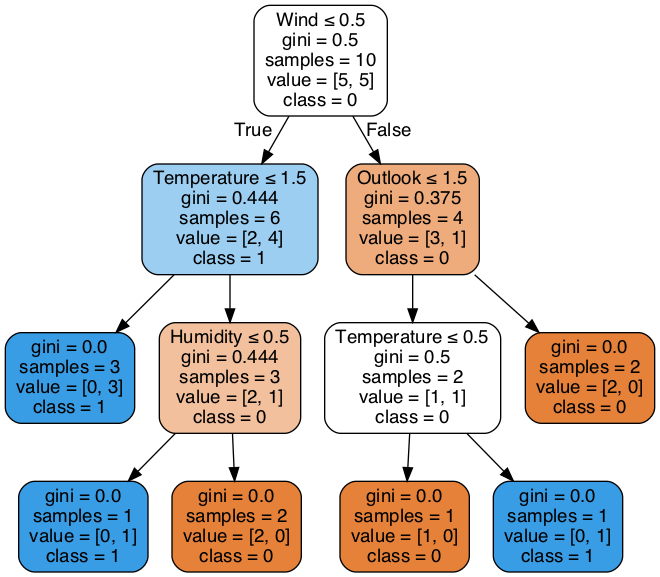

In [138]:
dot_data=StringIO()
export_graphviz(model2,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("question4.png")
Image(graph.create_png())

In [139]:
from sklearn import metrics

metrics.accuracy_score(yTest,yPredict)
print(metrics.classification_report(yTest,yPredict))
print(metrics.confusion_matrix(yTest,yPredict))
print(metrics.accuracy_score(yTest,yPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

[[0 0]
 [2 0]]
0.0


/Users/ivytran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ivytran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [140]:
fpr=dict()
tpr=dict()
roc_auc=dict()
score=model.predict_proba(xTrain)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(yTrain, score)

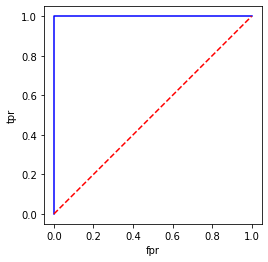

In [141]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(fpr,tpr,color='b')
ax.plot([0,1],[0,1],'r--')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.set_aspect('equal','box')